# Multivariate Time Series System

## PCA + Compression

In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
import os

In [2]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Dow Jones Industrial Average

In [5]:
data_path = '/Users/brunobarbarioli/Documents/Research/MTSDC/data/dow_jones_index/dow_jones_index.data'
dj = pd.read_csv(data_path)

In [5]:
dj.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [6]:
dj = dj[1:]

In [7]:
dj.head()
AA = dj[dj["stock"] == 'AA']

In [8]:
AA.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712


In [9]:
AA.shape

(24, 16)

In [10]:
AA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 372
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             24 non-null     int64  
 1   stock                               24 non-null     object 
 2   date                                24 non-null     object 
 3   open                                24 non-null     object 
 4   high                                24 non-null     object 
 5   low                                 24 non-null     object 
 6   close                               24 non-null     object 
 7   volume                              24 non-null     int64  
 8   percent_change_price                24 non-null     float64
 9   percent_change_volume_over_last_wk  24 non-null     float64
 10  previous_weeks_volume               24 non-null     float64
 11  next_weeks_open                     24 non-nul

In [11]:
AA['date']= AA['date'].astype('datetime64[ns]')

<ipython-input-11-c0f9c6a6d46e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AA['date']= AA['date'].astype('datetime64[ns]')


In [12]:
AA = AA.drop(['quarter', 'stock'], axis = 1)

In [13]:
AA = AA.rename(columns={'date': 'ds', 'percent_change_price': 'y'})

In [14]:
AA.set_index('ds')

,open,high,low,close,volume,y,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
ds,,,,,,,,,,,,,
2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
2011-02-11,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
2011-02-18,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
2011-02-25,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
2011-03-04,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
2011-03-11,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [15]:
AA['open'] = AA['open'].str.replace('$', '')
AA['high'] = AA['high'].str.replace('$', '')
AA['low'] = AA['low'].str.replace('$', '')
AA['close'] = AA['close'].str.replace('$', '')

In [16]:
AA[['open', 'high', 'low', 'close', 'volume', 'percent_change_volume_over_last_wk','days_to_next_dividend', 'percent_return_next_dividend']] = AA[['open', 'high', 'low', 'close', 'volume', 'percent_change_volume_over_last_wk','days_to_next_dividend', 'percent_return_next_dividend']].astype(float)

In [17]:
y = AA['percent_change_volume_over_last_wk']
ds = AA['ds']

In [18]:
# Prediction
AA_train = AA.loc[AA["ds"]<"6/3/2011"]
AA_test  = AA.loc[AA["ds"]>="6/3/2011"]

In [33]:
AA_train.set_index('ds')
AA_test.set_index('ds')

,open,high,low,close,volume,y,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
ds,,,,,,,,,,,,,
2011-06-03,16.73,16.83,15.77,15.92,77152591.0,-4.84160,-0.108849,77236662.0,$15.92,$15.28,-4.02010,61.0,0.188442
2011-06-10,15.92,16.03,15.17,15.28,94970970.0,-4.02010,23.094985,77152591.0,$15.29,$14.72,-3.72793,54.0,0.196335
2011-06-17,15.29,15.50,14.59,14.72,111273573.0,-3.72793,17.165880,94970970.0,$14.67,$15.23,3.81731,47.0,0.203804
2011-06-24,14.67,15.60,14.56,15.23,99423717.0,3.81731,-10.649299,111273573.0,$15.22,$16.31,7.16163,40.0,0.196980


In [34]:
m = Prophet()
m.add_regressor('open')
m.add_regressor('high')
m.add_regressor('low')
m.add_regressor('close')
m.add_regressor('volume')
m.add_regressor('percent_change_volume_over_last_wk')
m.add_regressor('days_to_next_dividend')
m.add_regressor('percent_return_next_dividend')
m.fit(AA_train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


In [36]:
forecast = m.predict(AA_test.drop(columns="y"))

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close,...,volume,volume_lower,volume_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-06-03,0.023965,-5.034881,-4.811713,0.023964,0.023965,-4.954144,-4.954144,-4.954144,-0.869348,...,-0.072506,-0.072506,-0.072506,0.070709,0.070709,0.070709,0.0,0.0,0.0,-4.930180
1,2011-06-10,0.023003,-4.596689,-4.388015,0.023002,0.023004,-4.520050,-4.520050,-4.520050,-1.506556,...,-0.045521,-0.045521,-0.045521,0.070709,0.070709,0.070709,0.0,0.0,0.0,-4.497048
2,2011-06-17,0.022041,-4.834062,-4.610722,0.022039,0.022043,-4.738328,-4.738328,-4.738328,-2.064113,...,-0.020831,-0.020831,-0.020831,0.070709,0.070709,0.070709,0.0,0.0,0.0,-4.716287
3,2011-06-24,0.021079,2.602759,2.817296,0.021075,0.021082,2.688593,2.688593,2.688593,-1.556338,...,-0.038777,-0.038777,-0.038777,0.070709,0.070709,0.070709,0.0,0.0,0.0,2.709672


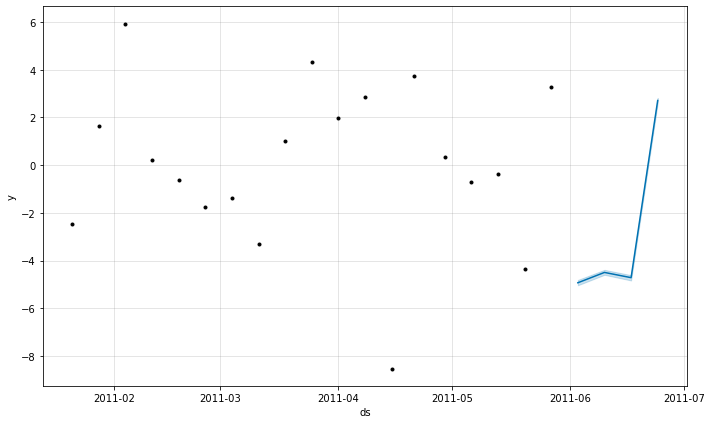

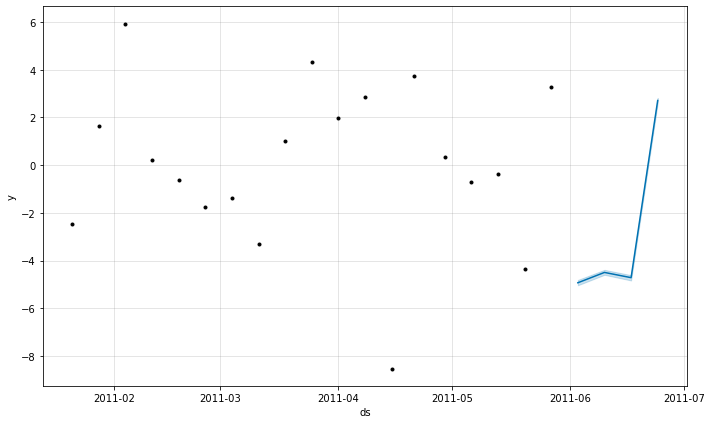

In [42]:
m.plot(forecast)

In [37]:
#PCA
X = AA.drop(['percent_change_volume_over_last_wk','ds', 'next_weeks_open', 'next_weeks_close'], axis = 1)
#X.set_index('ds')
X

,open,high,low,close,volume,y,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,16.71,16.71,15.64,15.97,242963398.0,-4.428490,239655616.0,-2.470660,19.0,0.187852
2,16.19,16.38,15.60,15.79,138428495.0,-2.470660,242963398.0,1.638310,12.0,0.189994
3,15.87,16.63,15.82,16.13,151379173.0,1.638310,138428495.0,5.933250,5.0,0.185989
4,16.18,17.39,16.18,17.14,154387761.0,5.933250,151379173.0,0.230814,97.0,0.175029
5,17.33,17.48,16.97,17.37,114691279.0,0.230814,154387761.0,-0.632547,90.0,0.172712
6,17.39,17.68,17.28,17.28,80023895.0,-0.632547,114691279.0,-1.766780,83.0,0.173611
7,16.98,17.15,15.96,16.68,132981863.0,-1.766780,80023895.0,-1.368230,76.0,0.179856
8,16.81,16.94,16.13,16.58,109493077.0,-1.368230,132981863.0,-3.317250,69.0,0.180941
9,16.58,16.75,15.42,16.03,114332562.0,-3.317250,109493077.0,1.003130,62.0,0.187149
10,15.95,16.33,15.43,16.11,130374108.0,1.003130,114332562.0,4.334550,55.0,0.186220


In [38]:
pca = PCA()
X_pca = pca.fit(X)

In [39]:
X_pca

PCA()

In [40]:
num_components = 4
pca = PCA(num_components)  
X_pca = pca.fit_transform(X)

In [41]:
X_pca

array([[ 1.56248770e+08,  3.62909560e+07,  4.19632498e-01,
         3.47511545e+00],
       [ 1.00171855e+08, -5.19919246e+07, -3.23515460e+01,
        -2.54022080e-01],
       [ 2.10360173e+07,  1.75263117e+07, -3.79933035e+01,
        -4.83739852e+00],
       [ 3.34353413e+07,  1.27275173e+07,  5.50644392e+01,
        -3.64106240e+00],
       [ 1.35893028e+07, -2.17833077e+07,  3.84564056e+01,
        -8.16611333e-01],
       [-3.87328255e+07, -2.81104777e+07,  2.23717244e+01,
         1.04728591e+00],
       [-3.75990563e+07,  3.51752905e+07,  2.78113135e+01,
         7.96235984e-01],
       [-7.03206830e+06, -1.40378041e+07,  1.59470077e+01,
         2.77086192e+00],
       [-2.37281977e+07,  3.17797196e+06,  9.62589618e+00,
        -7.36407473e-01],
       [-1.07022541e+07,  1.37172606e+07,  6.49200758e+00,
        -4.87251388e+00],
       [-1.70321551e+07, -2.40974818e+07, -8.72673209e+00,
        -2.78621577e+00],
       [-4.14504708e+07,  1.91809071e+06, -1.43628124e+01,
      

In [42]:
pca_df = pd.DataFrame(X_pca)

In [43]:
pca_df

,0,1,2,3
0,1.562488e+08,3.629096e+07,0.419632,3.475115
1,1.001719e+08,-5.199192e+07,-32.351546,-0.254022
2,2.103602e+07,1.752631e+07,-37.993303,-4.837399
3,3.343534e+07,1.272752e+07,55.064439,-3.641062
4,1.358930e+07,-2.178331e+07,38.456406,-0.816611
5,-3.873283e+07,-2.811048e+07,22.371724,1.047286
6,-3.759906e+07,3.517529e+07,27.811314,0.796236
7,-7.032068e+06,-1.403780e+07,15.947008,2.770862
8,-2.372820e+07,3.177972e+06,9.625896,-0.736407
9,-1.070225e+07,1.371726e+07,6.492008,-4.872514


In [44]:
pca_df['ds'] = ds.values
pca_df['y'] = y.values

In [46]:
AA_pca = pca_df

In [47]:
AA_pca

,0,1,2,3,ds,y
0,1.562488e+08,3.629096e+07,0.419632,3.475115,2011-01-14,1.380223
1,1.001719e+08,-5.199192e+07,-32.351546,-0.254022,2011-01-21,-43.024959
2,2.103602e+07,1.752631e+07,-37.993303,-4.837399,2011-01-28,9.355500
3,3.343534e+07,1.272752e+07,55.064439,-3.641062,2011-02-04,1.987452
4,1.358930e+07,-2.178331e+07,38.456406,-0.816611,2011-02-11,-25.712195
5,-3.873283e+07,-2.811048e+07,22.371724,1.047286,2011-02-18,-30.226696
6,-3.759906e+07,3.517529e+07,27.811314,0.796236,2011-02-25,66.177694
7,-7.032068e+06,-1.403780e+07,15.947008,2.770862,2011-03-04,-17.663150
8,-2.372820e+07,3.177972e+06,9.625896,-0.736407,2011-03-11,4.419900
9,-1.070225e+07,1.371726e+07,6.492008,-4.872514,2011-03-18,14.030601


In [48]:
AA_pca.columns = ['first', 'second', 'third', 'fourth','ds', 'y']

In [49]:
AA_pca

,first,second,third,fourth,ds,y
0,1.562488e+08,3.629096e+07,0.419632,3.475115,2011-01-14,1.380223
1,1.001719e+08,-5.199192e+07,-32.351546,-0.254022,2011-01-21,-43.024959
2,2.103602e+07,1.752631e+07,-37.993303,-4.837399,2011-01-28,9.355500
3,3.343534e+07,1.272752e+07,55.064439,-3.641062,2011-02-04,1.987452
4,1.358930e+07,-2.178331e+07,38.456406,-0.816611,2011-02-11,-25.712195
5,-3.873283e+07,-2.811048e+07,22.371724,1.047286,2011-02-18,-30.226696
6,-3.759906e+07,3.517529e+07,27.811314,0.796236,2011-02-25,66.177694
7,-7.032068e+06,-1.403780e+07,15.947008,2.770862,2011-03-04,-17.663150
8,-2.372820e+07,3.177972e+06,9.625896,-0.736407,2011-03-11,4.419900
9,-1.070225e+07,1.371726e+07,6.492008,-4.872514,2011-03-18,14.030601


In [50]:
# Prediction
AA_train_pca = AA_pca.loc[AA_pca["ds"]<"6/3/2011"]
AA_test_pca  = AA_pca.loc[AA_pca["ds"]>="6/3/2011"]

In [51]:
m = Prophet()
m.add_regressor('first')
m.add_regressor('second')
m.add_regressor('third')
m.add_regressor('fourth')
m.fit(AA_train_pca)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [52]:
forecast = m.predict(AA_test_pca.drop(columns="y"))

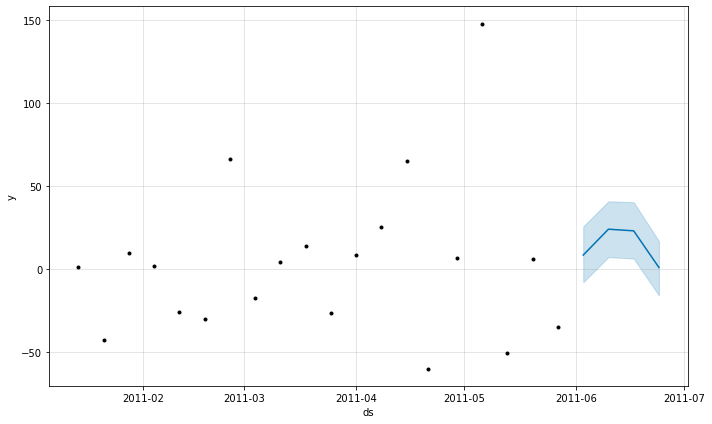

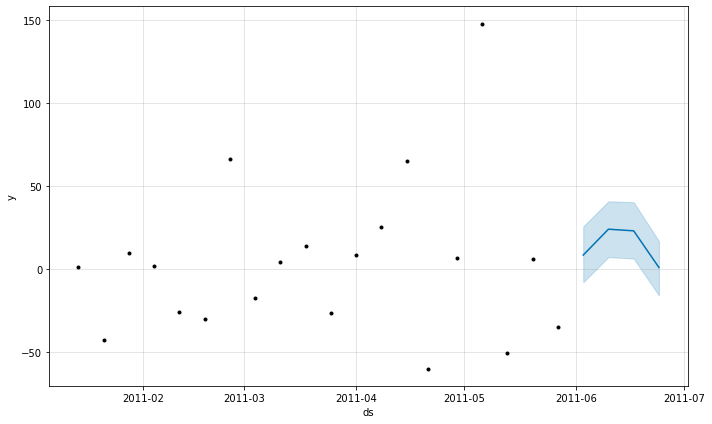

In [53]:
m.plot(forecast)

In [1]:
# How accurate the PCA is.
# Variance explained
# Next steps


Deep lens idea: video
Fast retrieval and storage system

## Metro Interstate Traffic Volume

In [3]:
data_path = '/Users/brunobarbarioli/Documents/Research/MTSDC/data/Metro_Interstate_Traffic_Volume.csv'
traffic = pd.read_csv(data_path)

In [4]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [28]:
traffic.iloc[34204]

holiday                               None
temp                                   295
rain_1h                                  0
snow_1h                                  0
clouds_all                               1
weather_main                         Clear
weather_description           sky is clear
date_time              2017-06-02 10:00:00
traffic_volume                        4694
Name: 34204, dtype: object

In [29]:
traffic = traffic.rename(columns={'date_time': 'ds', 'traffic_volume': 'y'})

In [16]:
# Prediction
traffic_train = traffic.loc[traffic["ds"]<"2017-06-02 10:00:00"]
traffic_test  = traffic.loc[traffic["ds"]>="2017-06-02 10:00:00"]

In [17]:
traffic_train.shape

(34204, 9)

In [18]:
traffic_train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ds,y
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [19]:
traffic_train.set_index('ds')
traffic_test.set_index('ds')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,y
ds,,,,,,,,
2017-06-02 10:00:00,None,295.00,0.0,0.0,1,Clear,sky is clear,4694
2017-06-02 11:00:00,None,297.28,0.0,0.0,20,Clouds,few clouds,5070
2017-06-02 12:00:00,None,299.35,0.0,0.0,20,Clouds,few clouds,5071
2017-06-02 13:00:00,None,301.36,0.0,0.0,20,Clouds,few clouds,5051
2017-06-02 14:00:00,None,302.36,0.0,0.0,40,Clouds,scattered clouds,5331
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [27]:
m = Prophet()
m.add_country_holidays(country_name='US')
#m.add_regressor('holiday')
m.add_regressor('temp')
m.add_regressor('rain_1h')
m.add_regressor('snow_1h')
#m.add_regressor('weather_main')
#m.add_regressor('weather_description')
m.fit(traffic_train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [31]:
forecast = m.predict(traffic_test.drop(columns="y"))

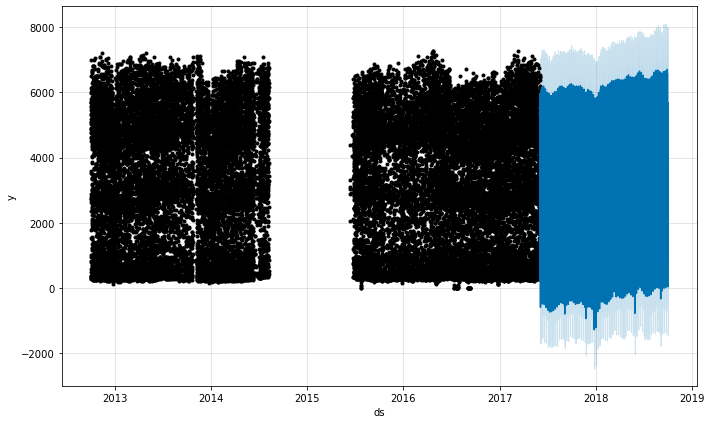

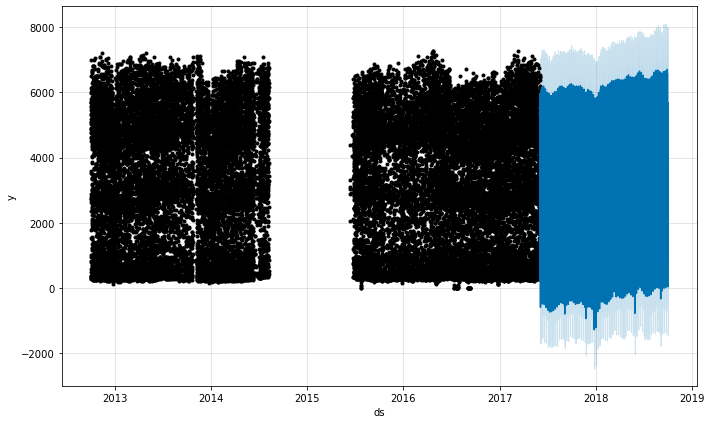

In [32]:
m.plot(forecast)

In [33]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2014-12-10 09:00:00 and 2016-06-02 09:00:00


In [34]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-06-11 20:00:00,3590.376098,2522.373156,4693.824772,2886,2014-12-10 09:00:00
1,2015-06-12 18:00:00,5033.969312,3883.195145,6144.002878,4380,2014-12-10 09:00:00
2,2015-06-12 20:00:00,3407.213385,2320.937635,4641.419673,3095,2014-12-10 09:00:00
3,2015-06-12 21:00:00,2863.995089,1854.347859,3955.427368,3299,2014-12-10 09:00:00
4,2015-06-13 21:00:00,1842.641078,768.615827,2946.124088,3040,2014-12-10 09:00:00


In [35]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,49 days 03:00:00,4.430542e+10,210488.526111,23241.084850,0.190373,0.777565
1,49 days 04:00:00,4.430542e+10,210488.527231,23241.444566,0.190713,0.777565
2,49 days 05:00:00,4.430542e+10,210488.527111,23241.664598,0.191372,0.777565
3,49 days 06:00:00,4.430542e+10,210488.527814,23241.849151,0.191563,0.777565
4,49 days 07:00:00,4.430542e+10,210488.527713,23241.842622,0.191563,0.777565


In [30]:
#PCA
y = traffic['y']
ds = traffic['ds']
X = traffic.drop(['holiday','ds', 'weather_main', 'weather_description'], axis = 1)
X

,temp,rain_1h,snow_1h,clouds_all,y
0,288.28,0.0,0.0,40,5545
1,289.36,0.0,0.0,75,4516
2,289.58,0.0,0.0,90,4767
3,290.13,0.0,0.0,90,5026
4,291.14,0.0,0.0,75,4918
...,...,...,...,...,...
48199,283.45,0.0,0.0,75,3543
48200,282.76,0.0,0.0,90,2781
48201,282.73,0.0,0.0,90,2159
48202,282.09,0.0,0.0,90,1450


In [31]:
num_components = 2
pca = PCA(num_components)  
X_pca = pca.fit_transform(X)

In [50]:
pca.explained_variance_ratio_

array([9.99064543e-01, 5.07718056e-04])

In [32]:
pca_df = pd.DataFrame(X_pca)
pca_df.head()

,0,1
0,2285.172595,-0.760681
1,1256.220935,-0.073777
2,1507.240570,0.130762
3,1766.240726,0.098584
4,1658.221987,-0.121627


In [33]:
pca_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       48204 non-null  float64
 1   1       48204 non-null  float64
dtypes: float64(2)
memory usage: 753.3 KB


In [34]:
pca_df['ds'] = ds.values
#pca_df['y'] = y.values
pca_df.head()

,0,1,ds
0,2285.172595,-0.760681,2012-10-02 09:00:00
1,1256.220935,-0.073777,2012-10-02 10:00:00
2,1507.240570,0.130762,2012-10-02 11:00:00
3,1766.240726,0.098584,2012-10-02 12:00:00
4,1658.221987,-0.121627,2012-10-02 13:00:00


In [38]:
pca_df = pca_df.set_index('ds')

In [39]:
pca_df.head()

,0,1
ds,,
2012-10-02 09:00:00,2285.172595,-0.760681
2012-10-02 10:00:00,1256.220935,-0.073777
2012-10-02 11:00:00,1507.240570,0.130762
2012-10-02 12:00:00,1766.240726,0.098584
2012-10-02 13:00:00,1658.221987,-0.121627


In [44]:
pca_df.columns = ['first', 'second','ds', 'y']

In [45]:
# Prediction
traffic_train_pca = pca_df.loc[pca_df["ds"]<"2017-06-02 10:00:00"]
traffic_test_pca  = pca_df.loc[pca_df["ds"]>="2017-06-02 10:00:00"]

In [46]:
traffic_train_pca.set_index('ds')
traffic_test_pca.set_index('ds')

,first,second,y
ds,,,
2017-06-02 10:00:00,1434.128171,-1.250389,4694
2017-06-02 11:00:00,1810.154720,-0.994272,5070
2017-06-02 12:00:00,1811.156530,-0.989720,5071
2017-06-02 13:00:00,1791.158313,-0.982593,5051
2017-06-02 14:00:00,2071.185181,-0.701221,5331
...,...,...,...
2018-09-30 19:00:00,283.216987,0.038417,3543
2018-09-30 20:00:00,-478.762901,0.371620,2781
2018-09-30 21:00:00,-1100.762146,0.451817,2159


In [47]:
m = Prophet()
m.add_country_holidays(country_name='US')
#m.add_regressor('holiday')
m.add_regressor('first')
m.add_regressor('second')
#m.add_regressor('weather_main')
#m.add_regressor('weather_description')
m.fit(traffic_train_pca)

In [48]:
forecast = m.predict(traffic_test_pca.drop(columns="y"))

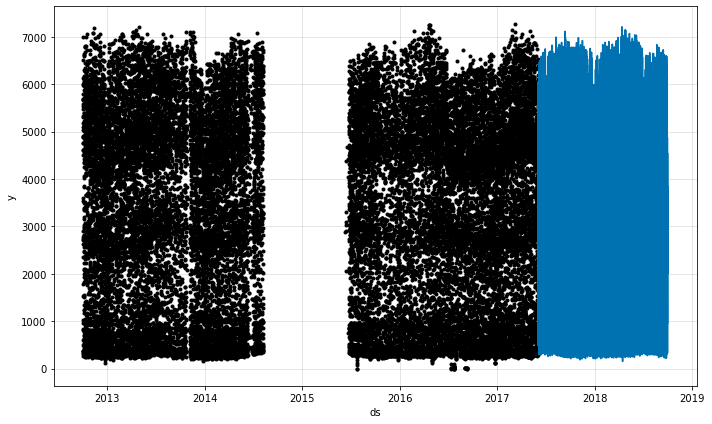

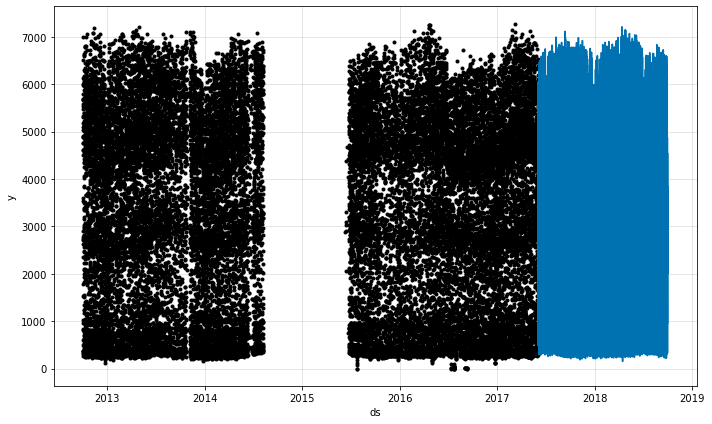

In [49]:
m.plot(forecast)

In [51]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2014-12-10 09:00:00 and 2016-06-02 09:00:00


In [52]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-06-11 20:00:00,3175.998901,2776.861860,3560.244773,2886,2014-12-10 09:00:00
1,2015-06-12 18:00:00,4669.923112,4267.496612,5058.788044,4380,2014-12-10 09:00:00
2,2015-06-12 20:00:00,3384.932131,2982.069917,3772.180499,3095,2014-12-10 09:00:00
3,2015-06-12 21:00:00,3588.933578,3185.710351,3976.670817,3299,2014-12-10 09:00:00
4,2015-06-13 21:00:00,3330.051852,2923.275136,3720.461766,3040,2014-12-10 09:00:00


In [53]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,49 days 03:00:00,25092.111493,158.404897,86.757426,0.000175,0.99968
1,49 days 04:00:00,25118.960441,158.489623,86.850076,0.000176,0.99968
2,49 days 05:00:00,25145.802024,158.574279,86.942933,0.000176,0.99968
3,49 days 06:00:00,25172.639065,158.658876,87.035570,0.000176,0.99968
4,49 days 07:00:00,25199.481022,158.743444,87.128462,0.000176,0.99968


In [54]:
# Compression
!pip install mtscomp

In [59]:
pca_df.to_pickle("/Users/brunobarbarioli/Documents/Research/MTSDC/data/pca.pkl")
traffic.to_pickle("/Users/brunobarbarioli/Documents/Research/MTSDC/data/normal.pkl")

In [58]:
pca = "/Users/brunobarbarioli/Documents/Research/MTSDC/data/pca.pkl"
file_stats = os.stat(pca)
print(f'File Size in MegaBytes is {file_stats.st_size / (1024 * 1024)}')

File Size in MegaBytes is 1.9921693801879883


In [60]:
normal = "/Users/brunobarbarioli/Documents/Research/MTSDC/data/normal.pkl"
file_stats = os.stat(normal)
print(f'File Size in MegaBytes is {file_stats.st_size / (1024 * 1024)}')

File Size in MegaBytes is 3.0047950744628906


## Initial system

In [3]:
from modules.separation import *
from modules.categorical_encoding import *

In [4]:
traffic.head()

NameError: name 'traffic' is not defined

In [22]:
traffic.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 14.1 MB


In [9]:
traffic = traffic.set_index('date_time')

In [10]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [11]:
continous, categorical = separator(traffic)

In [12]:
continous.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918


In [23]:
continous.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            48204 non-null  float64
 1   rain_1h         48204 non-null  float64
 2   snow_1h         48204 non-null  float64
 3   clouds_all      48204 non-null  int64  
 4   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 5.3 MB


In [35]:
categorical.head()

,holiday,weather_main,weather_description
date_time,,,
2012-10-02 09:00:00,None,Clouds,scattered clouds
2012-10-02 10:00:00,None,Clouds,broken clouds
2012-10-02 11:00:00,None,Clouds,overcast clouds
2012-10-02 12:00:00,None,Clouds,overcast clouds
2012-10-02 13:00:00,None,Clouds,broken clouds


In [14]:
categorical.columns[0]

'holiday'

In [15]:
len(categorical.columns)

3

In [16]:
for col in categorical.columns:
    print(col)

holiday
weather_main
weather_description


In [17]:
categorical.columns

Index(['holiday', 'weather_main', 'weather_description'], dtype='object')

In [19]:
categorical_encoded = cat_encoding(categorical)

In [18]:
categorical.astype('category')

,holiday,weather_main,weather_description
date_time,,,
2012-10-02 09:00:00,None,Clouds,scattered clouds
2012-10-02 10:00:00,None,Clouds,broken clouds
2012-10-02 11:00:00,None,Clouds,overcast clouds
2012-10-02 12:00:00,None,Clouds,overcast clouds
2012-10-02 13:00:00,None,Clouds,broken clouds
...,...,...,...
2018-09-30 19:00:00,None,Clouds,broken clouds
2018-09-30 20:00:00,None,Clouds,overcast clouds
2018-09-30 21:00:00,None,Thunderstorm,proximity thunderstorm


In [20]:
categorical.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   holiday              48204 non-null  object
 1   weather_main         48204 non-null  object
 2   weather_description  48204 non-null  object
dtypes: object(3)
memory usage: 12.3 MB


In [21]:
categorical_encoded.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   encoded_holiday              48204 non-null  int8 
 1   encoded_weather_main         48204 non-null  int8 
 2   encoded_weather_description  48204 non-null  int8 
dtypes: int8(3)
memory usage: 3.6 MB


In [36]:
categorical_encoded.head()

,encoded_holiday,encoded_weather_main,encoded_weather_description
date_time,,,
2012-10-02 09:00:00,7,1,24
2012-10-02 10:00:00,7,1,2
2012-10-02 11:00:00,7,1,19
2012-10-02 12:00:00,7,1,19
2012-10-02 13:00:00,7,1,2


In [41]:
result = pd.concat([pca_df, categorical_encoded], axis=1, join="inner")

In [42]:
result.head()

,0,1,encoded_holiday,encoded_weather_main,encoded_weather_description
2012-10-02 09:00:00,2285.172595,-0.760681,7,1,24
2012-10-02 10:00:00,1256.220935,-0.073777,7,1,2
2012-10-02 11:00:00,1507.240570,0.130762,7,1,19
2012-10-02 12:00:00,1766.240726,0.098584,7,1,19
2012-10-02 13:00:00,1658.221987,-0.121627,7,1,2


In [43]:
result.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   0                            48204 non-null  float64
 1   1                            48204 non-null  float64
 2   encoded_holiday              48204 non-null  int8   
 3   encoded_weather_main         48204 non-null  int8   
 4   encoded_weather_description  48204 non-null  int8   
dtypes: float64(2), int8(3)
memory usage: 4.4 MB


## Numpy version

In [5]:
data_path = '/Users/brunobarbarioli/Documents/Research/MTSDC/data/Metro_Interstate_Traffic_Volume.csv'
traffic = pd.read_csv(data_path)

In [22]:
from sys import getsizeof

In [6]:
from modules.separation import *
from modules.categorical_encoding import *
from modules.dimensionality_reduction import *
from modules.merger import *
from modules.blocking import *

In [43]:
traffic = traffic.set_index(traffic['date_time'])

In [112]:
initial_size = getsizeof(traffic.to_numpy)

In [122]:
initial_size = traffic.to_numpy().nbytes

In [121]:
print(traffic.to_numpy().nbytes)

3470688


In [114]:
traffic.to_numpy

<bound method DataFrame.to_numpy of                     holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2012-10-02 09:00:00    None  288.28      0.0      0.0          40   
2012-10-02 10:00:00    None  289.36      0.0      0.0          75   
2012-10-02 11:00:00    None  289.58      0.0      0.0          90   
2012-10-02 12:00:00    None  290.13      0.0      0.0          90   
2012-10-02 13:00:00    None  291.14      0.0      0.0          75   
...                     ...     ...      ...      ...         ...   
2018-09-30 19:00:00    None  283.45      0.0      0.0          75   
2018-09-30 20:00:00    None  282.76      0.0      0.0          90   
2018-09-30 21:00:00    None  282.73      0.0      0.0          90   
2018-09-30 22:00:00    None  282.09      0.0      0.0          90   
2018-09-30 23:00:00    None  282.12      0.0      0.0          90   

                     weather_main     weather_description  \
date_

In [8]:
timestamp = traffic['date_time']

In [9]:
continous, categorical, timestamps = separator(traffic)

In [10]:
categorical

array([['None', 'Clouds', 'scattered clouds', '2012-10-02 09:00:00'],
       ['None', 'Clouds', 'broken clouds', '2012-10-02 10:00:00'],
       ['None', 'Clouds', 'overcast clouds', '2012-10-02 11:00:00'],
       ...,
       ['None', 'Thunderstorm', 'proximity thunderstorm',
        '2018-09-30 21:00:00'],
       ['None', 'Clouds', 'overcast clouds', '2018-09-30 22:00:00'],
       ['None', 'Clouds', 'overcast clouds', '2018-09-30 23:00:00']],
      dtype=object)

In [11]:
continous_reduced = reduction(continous)

Explained variance: [9.99064543e-01 5.07718056e-04]


In [12]:
continous_reduced

array([[ 2.28517260e+03, -7.60680603e-01],
       [ 1.25622093e+03, -7.37770972e-02],
       [ 1.50724057e+03,  1.30762237e-01],
       ...,
       [-1.10076215e+03,  4.51817355e-01],
       [-1.80976182e+03,  5.41862277e-01],
       [-2.30576117e+03,  6.05936077e-01]])

In [17]:
categorical_encoded = cat_encoding(categorical)

In [91]:
merged = merge(continous_reduced, categorical_encoded, timestamp)

In [92]:
len(merged)

48204

In [98]:
blocks = blocking(merged,128)

In [82]:
final_blocks = [np.round(x,2) for x in blocks]

In [ ]:
final_blocks = [[np.round(float(i), 2) for i in nested] for nested in outerlist]

In [83]:
final_blocks

[array([[ 2.28517e+03, -7.60000e-01,  7.00000e+00,  1.00000e+00,
          2.40000e+01,  0.00000e+00],
        [ 1.25622e+03, -7.00000e-02,  7.00000e+00,  1.00000e+00,
          2.00000e+00,  1.00000e+00],
        [ 1.50724e+03,  1.30000e-01,  7.00000e+00,  1.00000e+00,
          1.90000e+01,  2.00000e+00],
        ...,
        [-1.10076e+03,  4.50000e-01,  7.00000e+00,  1.00000e+01,
          2.10000e+01,  4.05720e+04],
        [-1.80976e+03,  5.40000e-01,  7.00000e+00,  1.00000e+00,
          1.90000e+01,  4.05730e+04],
        [-2.30576e+03,  6.10000e-01,  7.00000e+00,  1.00000e+00,
          1.90000e+01,  4.05740e+04]]),
 array([[ 2.28517e+03, -7.60000e-01,  7.00000e+00,  1.00000e+00,
          2.40000e+01,  0.00000e+00],
        [ 1.25622e+03, -7.00000e-02,  7.00000e+00,  1.00000e+00,
          2.00000e+00,  1.00000e+00],
        [ 1.50724e+03,  1.30000e-01,  7.00000e+00,  1.00000e+00,
          1.90000e+01,  2.00000e+00],
        ...,
        [-1.10076e+03,  4.50000e-01,  7.00000

In [116]:
len(final_blocks)

376

In [123]:
final_blocks = np.asarray(blocks)

In [125]:
final_size = final_blocks.nbytes

In [117]:
final_size = getsizeof(final_blocks)
print(final_size)

3296


In [ ]:
print('compression rate: ' + str(initial_size/final_size))